# MNIST Dataset Introduction

[1]:http://yann.lecun.com/exdb/mnist/

[MNIST][1]是一套手写体数字的图像数据集合，包含60000个训练样例和10000个测试样例，由纽约大学的Yann LeCun等人维护。

<img width=80% height=80% src="imgs/02/01.jpeg" alt="imgs/02/01.jpeg" title="图1" />

### Introduction to Handwritten MNIST Array

MNIST图像数据集使用形如 [28, 28] 的二阶数组表示每个手写体数字，数组中的每个元素对应一个像素点，即每张图像大小固定为 28*28 像素。

<img width=80% height=80% src="imgs/07/01.png" alt="imgs/07/01.png" title="图2" />

MNIST数据集中的图像都是256阶灰度图，即灰度值0表示白色（背景），255表示黑色（前景），使用取值为[0,255]的uint8数据类型表示图像。为了加速训练，我们需要做数据规范化，将灰度值缩放为[0,1]的float32数据类型。

<img width=80% height=80% src="imgs/07/02.png" alt="imgs/07/02.png" title="图3" />

由于每张图像的尺寸都是28*28像素，为了方便连续存储，我们可以将形如[28,28]的二阶数组“摊平”成形如[784, ]的一阶数组，可以表示 $256*256*...*256=256^{784}$张不同的图像。

但这些图像并非每一张都代表有效的手写体数字，其中绝大部分都是如下的噪声图：

<img width=80% height=80% src="imgs/07/03.png" alt="imgs/07/03.png" title="图4" />

### Download MNIST Data Set

一个曾广泛使用（如 chapter-2/basic-model.ipynb），如今被废弃的（deprecated）方法:

In [2]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('datas/mnist')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datas/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datas/mnist\train-labels-idx1-ubyte.gz
Extracting datas/mnist\t10k-images-idx3-ubyte.gz
Extracting datas/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
from __future__ import print_function

# import dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('datas/mnist', one_hot=True)

import tensorflow as tf

Extracting datas/mnist\train-images-idx3-ubyte.gz
Extracting datas/mnist\train-labels-idx1-ubyte.gz
Extracting datas/mnist\t10k-images-idx3-ubyte.gz
Extracting datas/mnist\t10k-labels-idx1-ubyte.gz


### Download MNIST Data Set by Keras

tf.kera.datasets.mnist.load_data(path='mnnist.npz')

Arguments:

- path:本地缓存MNIST数据集(mnist.npz)的相对路径(~/.keras/datasets)

Returns:

- Tuple of Numpy arrays:`(x_train, y_train), (x_test, y_test)`


In [4]:
from tensorflow.keras.datasets import mnist

# 只能是相对路径，放在(~/.keras/datasets)目录下
(x_train, y_train), (x_test, y_test) = mnist.load_data('mnist.npz')

11493376/11490434 [==============================] - 3s 0us/step


In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### MNIST DataSet Visualization

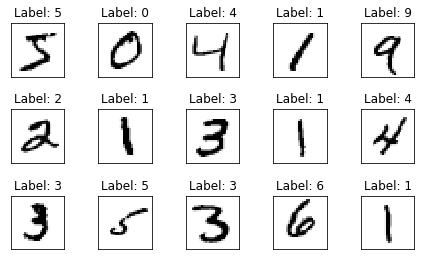

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(3, 5, i+1) # 绘制前15个手写体数字，3行5列展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(x_train[i], cmap='Greys') # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(y_train[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记

### 感知机模型

1957年，受 Warren McCulloch 和 Walter Pitts 在神经元建模方面工作的启发，心理学家 Frank Rosenblatt 参考大脑中神经元信息传递信号的工作机制，发明了神经感知机模型 Perceptron。

<img width=80% height=80% src="imgs/07/04.png" alt="imgs/07/04.png" title="图5" />

### 神经网络

在机器学习和认知科学领域，人工神经网络（ANN），简称神经网络（NN）是一种模仿生物神经网络（动物的中枢神经系统，特别是大脑）的结构和功能的数学模型或计算模型，用于对函数进行估计或近似。神经网络是**多层神经元的连接**，上一层神经元的输出，作为下一层神经元的输入。

<img width=80% height=80% src="imgs/07/05.png" alt="imgs/07/05.png" title="图6" />

### 线性不可分

<img width=80% height=80% src="imgs/07/06.png" alt="imgs/07/06.png" title="图7" />

### 激活函数（Activation Function）

为了实现神经网络的非线性建模能力，解决一些线性不可分的问题，我们通常使用激活函数来引入分线性因素。激活函数都采用非线性函数，常用的有Sigmoid、tanh、ReLU等。

<img width=80% height=80% src="imgs/07/07.png" alt="imgs/07/07.png" title="图8" />

### 全连接层（fully connected layers，FC）

全连接层是一种对输入数据直接做线性变换的线性计算层。它是神经网络中最常用的一层，用于学习输出数据和输入数据之间的变换关系。全连接层可以作为特征提取层使用，在学习特征的同时实现特征融合；也可作为最终的分类层使用，其输出神经元的值代表了每个输出类别的概率。

<img width=80% height=80% src="imgs/07/08.png" alt="imgs/07/08.png" title="图9" />

### 前向传播

符号定义：

- $L$为网络层数，$w$和$b$为模型参数，$X$为输入数据
- $x_i$:第$1$层第$i$个神经元的输入
- ${a_i}^{(l)}$:第$l$层第$i$个神经元的输出（当$l=1$时，${a_i^{(1)}}=x_i$）
- $w_{ij}^{(l)}$:第$l$层第$j$个神经元到第$l+1$层第$i$个神经元的权重
- $b_i^{(l)}$：第$l$层第$i$个神经元的偏置
- $h_{w,b}(X)$:神经元网络（假设函数）输出数据
- $( \overrightarrow{W},\overrightarrow{B})=(w^{(l)},b^{(l)}),l=1,...,L$

<img width=70% height=70% src="imgs/07/09.png" alt="imgs/07/09.png" title="图10" />

3层神经网络 计算过程：

- $a_1^{(2)}=f(w_{11}^{(1)}x_1+w_{12}^{(1)}x_2+w_{13}^{(1)}x_3+b_1^{(1)})$
- $a_2^{(2)}=f(w_{21}^{(1)}x_1+w_{22}^{(1)}x_2+w_{23}^{(1)}x_3+b_2^{(1)})$
- $a_3^{(2)}=f(w_{31}^{(1)}x_1+w_{32}^{(1)}x_2+w_{33}^{(1)}x_3+b_3^{(1)})$
- $h_{w,b}(X)=a_3^{(3)}=f(w_{11}^{(2)}a_1^{(2)}+w_{12}^{(2)}a_2^{(2)}+w_{13}^{(2)}a_3^{(2)}+b_1^{(2)})$

简化形式：

$$z_i^{(l)}=\sum_{j=1}^{n}{w^{(l-1)}a^{(l-1)}+b^{(l-1)}}$$

$$a_i^{(l)}=f(z_i^{(l)}), i=1,...,n$$

$$h_{w,b}(X)=a_3^{(3)}=f(z_3^{(3)})$$

### 后向传播（Back Propagation, BP）

BP算法的基本思想是通过损失函数$\color{#ea4339}{对模型参数进行求导}$,并根据复合函数求导常用的“$\color{#ea4339}{链式法则}$”将不同层的模型参数的梯度联系起来，使得计算所有模型参数的梯度更简单。BP算法的思想早在1960年就被提出来了。直到1986年，David Rumelhart和Geoffrey Hinton等人发表了一篇后来成为经典的论文，清晰的描述了BP算法的框架，才使得BP算法真正流行起来，并带来了神经网络在80年代的辉煌。

### MNIST Softmax 网络

将表示手写体数字的形如[784]的一维向量作为输入；中间定义2层512个神经元的隐藏层，具备一定模型复杂度，足以识别手写体数字；最后定义1层10个神经元的全联接层，用于输出10个不同类别的“概率”。

<img width=80% height=80% src="imgs/07/10.png" alt="imgs/07/10.png" title="图11" />

<img width=80% height=80% src="imgs/07/11.png" alt="imgs/07/11.png" title="图12" />